# Optimization

Optimization is the process of finding the values of variables that minimize or maximize a given function. The SciPy library in Python provides a wide range of optimization algorithms that can be used to find the optimal values of variables for a given function.

Before we dive into the specifics of using SciPy for optimization, let's first define some important terms related to optimization:

- Objective Function: A mathematical function that we want to minimize or maximize.
- Constraints: Conditions that restrict the possible values of the variables in the objective function.
- Global Minimum/Maximum: The lowest/highest value of the objective function over its entire domain.
- Local Minimum/Maximum: The lowest/highest value of the objective function in a particular region of its domain.
Now, let's move on to how to use SciPy for optimization.

First, we need to import the necessary libraries. We will use the following libraries:

In [8]:
import numpy as np
import scipy.optimize as sco

Next, we need to define our objective function. In optimization, our objective is to minimize or maximize the function. Let's consider the following example objective function:

$f(x) = x_0^2+x_1^2$

In [9]:
def objective(x):
    return x[0]**2 + x[1]**2


## Unconstrained Optimization

In this case, we want to find the values of `x` that minimize the sum of the squares of its two components.

We can use the `minimize` function from the `scipy.optimize` library to find the minimum of our objective function. The `minimize` function requires us to provide the objective function and an initial guess for the values of `x`.

In [10]:
x0 = np.array([1.0, 1.0])
result = sco.minimize(objective, x0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.311471135620994e-16
        x: [-1.075e-08 -1.075e-08]
      nit: 2
      jac: [-6.600e-09 -6.600e-09]
 hess_inv: [[ 7.500e-01 -2.500e-01]
            [-2.500e-01  7.500e-01]]
     nfev: 9
     njev: 3


In the above code, we are using an initial guess of `[1.0, 1.0]` for the values of `x`. The `minimize` function returns the optimal values of `x` that minimize the objective function.

- `fun`: output of the objective function
- `nfev`: number of function evaluations
- `nit`: number of iterations
- `njev`: number of evaluations of the objective function's gradient
- `x`: the values of the choice variables at the optimum

## Constrained Optimization

Now, let's consider an example where we have constraints in our optimization problem. Let's say we want to minimize the same objective function as before subject to the following constraints:

- `x[0] + x[1] = 1`
- `x[0] >= 0`
- `x[1] >= 0`

We can define our constraints as follows:

In [11]:
def constraint1(x):
    return x[0] + x[1] - 1.0

def constraint2(x):
    return x[0]

def constraint3(x):
    return x[1]


We can then use the `minimize` function with the constraints argument to find the optimal values of `x` that minimize the objective function subject to the given constraints.

In [12]:
constraints = ({'type': 'eq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3})

result = sco.minimize(objective, x0, constraints=constraints)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5000000000000002
       x: [ 5.000e-01  5.000e-01]
     nit: 2
     jac: [ 1.000e+00  1.000e+00]
    nfev: 6
    njev: 2


In the above code, we are using the `{'type': 'eq'}` constraint to specify the equality constraint and `{'type': 'ineq'}` constraint to specify the inequality constraints.

## Portfolio Optimization

Portfolio optimization is the process of selecting the optimal combination of assets to achieve a desired risk-return profile. We will explore how to use the SciPy library in Python to perform portfolio optimization.

Before we dive into the specifics of using SciPy, let's first define some important terms related to portfolio optimization:

- Return: The gain or loss on an investment, expressed as a percentage of the initial investment.
- Risk: The likelihood that an investment's actual return will differ from its expected return.
- Covariance: The measure of how two assets move in relation to each other.
- Correlation: A statistical measure that indicates the extent to which two or more variables are related.
Now, let's move on to how to use SciPy for portfolio optimization.

First, we need to import the necessary libraries. We will use the following libraries:

In [13]:
import numpy as np
import pandas as pd
import scipy.optimize as sco

Next, we need to obtain our asset data. We will use a sample dataset of three stocks over seven periods.


In [14]:
stocks = ['Stock A', 'Stock B', 'Stock C']
price_data = np.array([
    [7,9,2],
    [8,8,6],
    [4,7,9],
    [1,8,5],
    [9,2,5],
    [3,3,3],
    [1,1,5]
])

data = pd.DataFrame(price_data, columns = stocks)
data

,Stock A,Stock B,Stock C
0,7,9,2
1,8,8,6
2,4,7,9
3,1,8,5
4,9,2,5
5,3,3,3
6,1,1,5


We can plot the price movement using the `lineplot` function from the `seaborn` library as follows:

<Axes: >

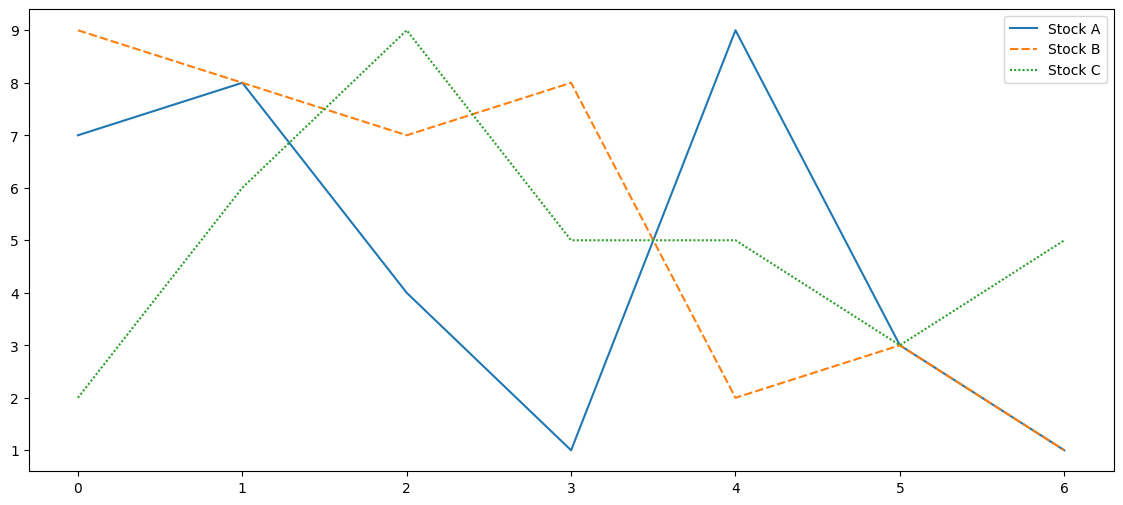

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

sns.lineplot(data=data)

The `returns` can be calculated by subtracting the current price from the previous price using the `shift` function.  Remember to remove `NaN` values which occur from trying to subtract the initial price from a previous price which does not exist.  The leaves six return periods.

In [16]:
returns = data/data.shift(1)-1
returns = returns.dropna()
returns

,Stock A,Stock B,Stock C
1,0.142857,-0.111111,2.000000
2,-0.500000,-0.125000,0.500000
3,-0.750000,0.142857,-0.444444
4,8.000000,-0.750000,0.000000
5,-0.666667,0.500000,-0.400000
6,-0.666667,-0.666667,0.666667


We can plot the returns using the `lineplot` function from the `seaborn` library as follows:

<Axes: >

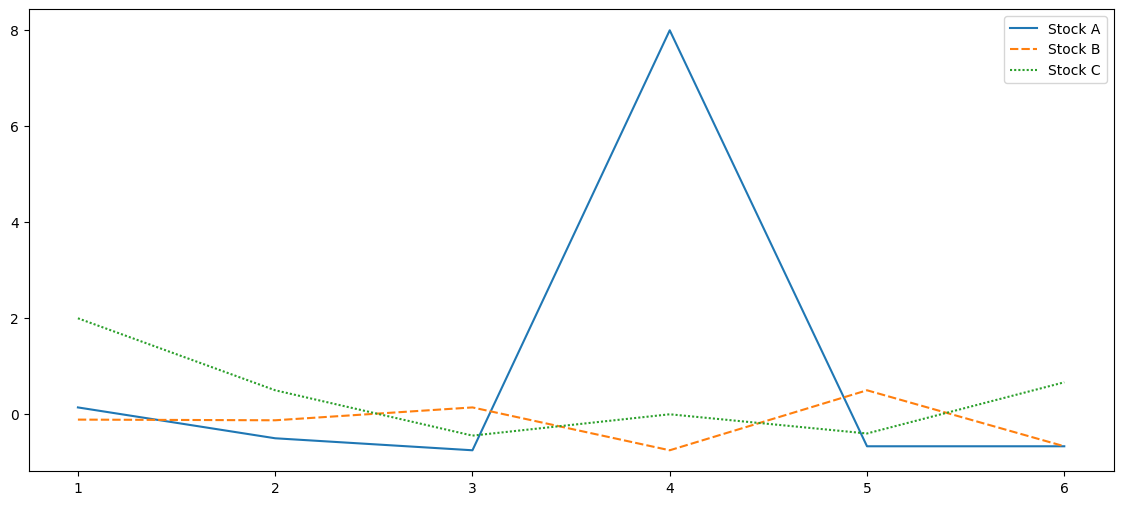

In [17]:
plt.figure(figsize=(14,6))

sns.lineplot(data=returns)

`Stock A` has the highest return from period 3 to period 4 but also the highest drop in price from period 4 to period 5.

We can calculate the average returns using the `mean` function.

In [18]:
mean_returns = returns.mean()
mean_returns

Stock A    0.926587
Stock B   -0.168320
Stock C    0.387037
dtype: float64

In terms of the average returns, `Stock A` performs the best and `Stock B` performs the worst.

We can visualise this by deriving a bar chart using the `barplot` function from the `seaborn` library.

<Axes: >

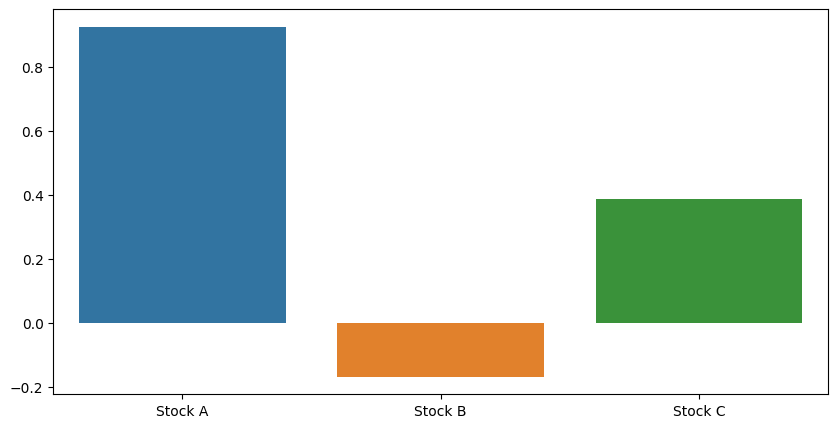

In [19]:
plt.figure(figsize=(10,5))

sns.barplot(x=mean_returns.index, y=mean_returns)

According to Markowitz, return is not the only metric that should be considered when selecting a portfolio of assets.  These returns are not guaranteed due to volatility in price movement.  Hence we can calculate the standard deviation using the `std` function and plot the volatility on a bar chart.  

In [20]:
st_dev = returns.std()
st_dev

Stock A    3.480529
Stock B    0.476515
Stock C    0.911393
dtype: float64

<Axes: >

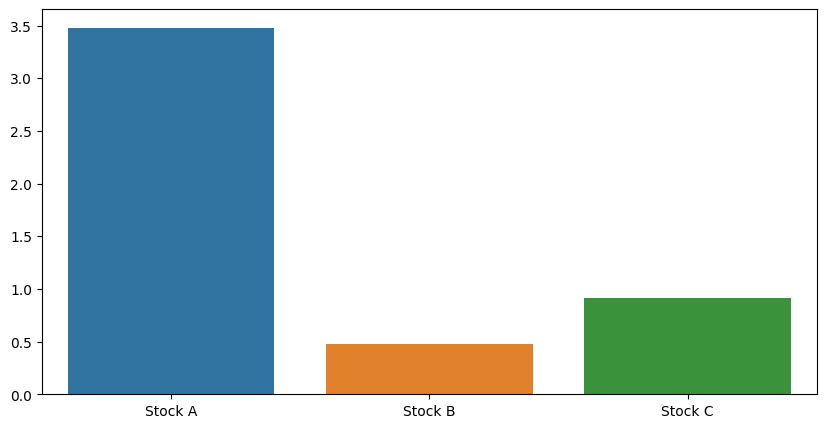

In [21]:
plt.figure(figsize=(10,5))

sns.barplot(x=st_dev.index, y=st_dev)

The graph above indicates that higher volatilites are rewarded with higher returns.  To determine which stock has a higher reward for a given level of volatility, we can calculate the Sharpe Ratio which determines which the return per unit of risk

In [22]:
sharpe_ratio = mean_returns/st_dev
sharpe_ratio

Stock A    0.266220
Stock B   -0.353231
Stock C    0.424665
dtype: float64

<Axes: >

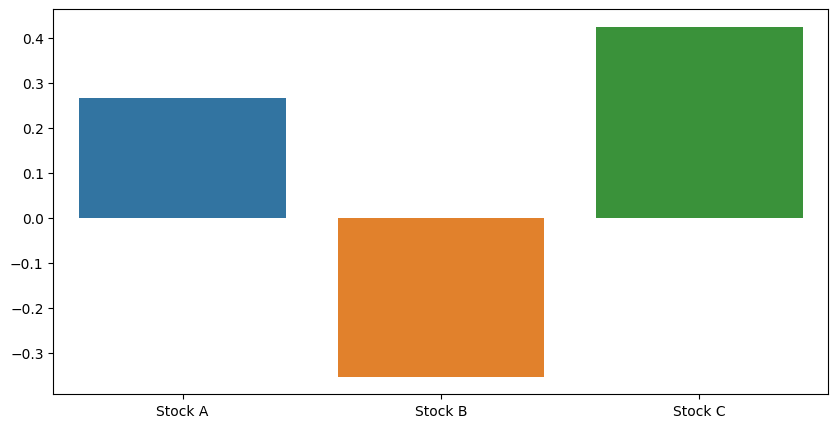

In [23]:
plt.figure(figsize=(10,5))

sns.barplot(x=sharpe_ratio.index, y=sharpe_ratio)

The above graphic shows that `Stock C` is the best performing stock according to the Sharpe Ratio, even though `Stock A` produces the highest return on average.

However, even though the graphics are a good indicator of how the portfolio should be constructed, they do not account for portfolio diversification.  Hence we need to calculate the variance-covariance matrix using the `cov` function which will be used to calculate portfolio volatility.  Portfolio volatility is used as the objective function for the minimum variance portfolio and accounts for the denominator of the objective function for the maximum Sharpe Ratio portfolio.

In [24]:
cov_matrix = returns.cov()
cov_matrix

,Stock A,Stock B,Stock C
Stock A,12.114083,-1.002725,-0.392094
Stock B,-1.002725,0.227067,-0.120356
Stock C,-0.392094,-0.120356,0.830638


Using `seaborn` to produce a heatmap using the `heatmap` function, we can see that the all the stocks have negative covariance with each other.  Along the principal diagonal, we can see the variance of each stock (covariance with itself).  `Stock A` is the most volatile.

<Axes: >

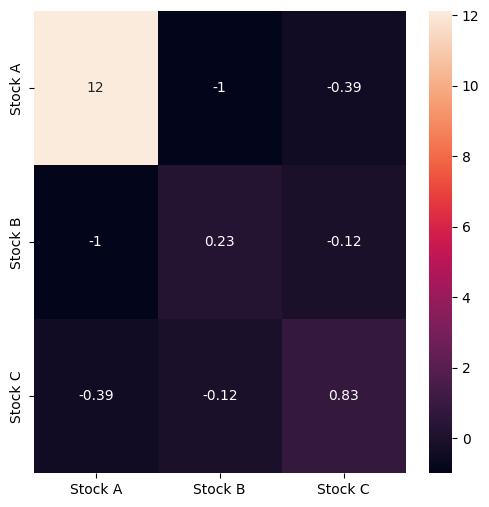

In [25]:
plt.figure(figsize=(6,6))

sns.heatmap(cov_matrix,annot=True)

## Maximum Sharpe Ratio

The maximum Sharpe Ratio portfolio maximizes the portfolio Sharpe Ratio by adjusting the weights of each stock within the portfolio.  Since `scipy.optimize` does not have a maxmization function, we need to multiply the objective function by negative 1 such that minimization of this new function is actually maximizing the original function.  We can create the objective function by creating a python function

In [26]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_var)
    sharpe_ratio = portfolio_return / portfolio_std_dev
    return -sharpe_ratio

Next, we need to create the constraints using Python functions.  First constraint is that the weights need to sum up to 1 and the second constraint indicates that there is no shorting of assets i.e. each asset needs to have a non-negative weight.

In [27]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

Finally, we need to combine the constraints into a dictionary, set the intial weights (most likely equally weighted or an arbitrary non-zero weight), indicate the bounds as a tuple for each weight (lower limit of zero and upper limit of one) and then feed these parameters into the `minimize` function using the `Sequential Least Squares Programming - SLSQP`

In [28]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(neg_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5324410276384252
       x: [ 1.542e-01  2.906e-17  8.458e-01]
     nit: 8
     jac: [-7.664e-04  1.557e-02  1.397e-04]
    nfev: 33
    njev: 8

In [29]:
print('The Maximum Sharpe Ratio Portfolio produces a maximum return of ', -np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

The Maximum Sharpe Ratio Portfolio produces a maximum return of  0.53
With a weight vector as follows:  [0.15 0.   0.85]


## Minimum Variance

The Minimum Variance portfolio minimizes portfolio variance by adjusting the weights of each stock within the portfolio.  `scipy.optimize` can be used to minimize the portfolio variance.  We can create the objective function by creating a python function which takes `weights` and `cov_matrix` as arguments.

In [30]:
def portfolio_var(weights, cov_matrix):
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_var

In [31]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

In [32]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(portfolio_var, initial_weights, args=(cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0646323593658885
       x: [ 7.137e-02  7.137e-01  2.149e-01]
     nit: 6
     jac: [ 1.293e-01  1.293e-01  1.293e-01]
    nfev: 25
    njev: 6

In [33]:
print('The Minimum Variance Portfolio produces a minimum variance of ', np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

The Minimum Variance Portfolio produces a minimum variance of  0.06
With a weight vector as follows:  [0.07 0.71 0.21]


## Maximum Return

The Maximum Return portfolio maximizes portfolio return by adjusting the weights of each stock within the portfolio.  `scipy.optimize` can be used to minimize the negative of the portfolio return.  We can create the objective function by creating a python function which takes `weights` and `mean_returns` as arguments.

In [34]:
def neg_portfolio_return(weights, mean_returns):
    portfolio_return = np.sum(mean_returns * weights)
    return -portfolio_return

In [35]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

In [36]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(neg_portfolio_return, initial_weights, args=(mean_returns), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9265873015873014
       x: [ 1.000e+00  0.000e+00  0.000e+00]
     nit: 3
     jac: [-9.266e-01  1.683e-01 -3.870e-01]
    nfev: 12
    njev: 3

In [37]:
print('The Maximum Return Portfolio produces a maximum return of ', -np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

The Maximum Return Portfolio produces a maximum return of  0.93
With a weight vector as follows:  [1. 0. 0.]


`sco.minimize` function takes several arguments.  `

## Risk Parity Portfolio

The Risk Parity Portfolio maximizes returns or minimizes portfolio variance with an additional constraints.  The number of additional constraints are equal to `m-1` where `m` is the number of stocks in a portfolio.  These additional constraints stipulate that the marginal contribution of each stock to portfolio risk needs to be equal to every other stock in the portfolio.  For instance in a three stock portfolio, there will be two additional constraints where the marginal contribution on `Stock A` needs to be equal to the marginal constribution of `Stock B`.  Furthermore, the marginal contribution of `Stock B` needs to be equal to the marginal contribution to `Stock C`.  Therefore by Young's Theorem, the marginal contribution of `Stock A` will be equal to the marginal contribution of `Stock C` and hence does not need to be stipulated.

Since the previous example does not have a point where this is true, a new example is generated for Risk Parity Portfolio following the steps of previous examples and only changing with regards to the constraints.

In [38]:
P = np.array([
    [10,5,1],
    [5,10,2],
    [10,5,4],
    [4,1,8],
    [2,2,8],
    [1,1,1],
    [5,10,4],
    [10,5,8],
    [1,5,10],
    [4,10,8],
    [2,4,4]
])

data = pd.DataFrame(P,columns=stocks)
data

,Stock A,Stock B,Stock C
0,10,5,1
1,5,10,2
2,10,5,4
3,4,1,8
4,2,2,8
5,1,1,1
6,5,10,4
7,10,5,8
8,1,5,10
9,4,10,8


In [39]:
returns = data/data.shift(1)-1
returns = returns.dropna()
returns

,Stock A,Stock B,Stock C
1,-0.5,1.0,1.000
2,1.0,-0.5,1.000
3,-0.6,-0.8,1.000
4,-0.5,1.0,0.000
5,-0.5,-0.5,-0.875
6,4.0,9.0,3.000
7,1.0,-0.5,1.000
8,-0.9,0.0,0.250
9,3.0,1.0,-0.200
10,-0.5,-0.6,-0.500


In [40]:
cov_matrix = returns.cov()
cov_matrix

,Stock A,Stock B,Stock C
Stock A,2.905000,3.669444,1.071250
Stock B,3.669444,8.607667,2.397028
Stock C,1.071250,2.397028,1.210840


In [41]:
def neg_portfolio_return(weights, mean_returns):
    portfolio_return = np.sum(mean_returns * weights)
    return -portfolio_return

In [42]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

def MCA_MCB(weights):
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    MCA = (weights[0]/portfolio_var)*(weights@cov_matrix.iloc[0])
    MCB = (weights[1]/portfolio_var)*(weights@cov_matrix.iloc[1])
    return MCA-MCB

def MCB_MCC(weights):
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    MCB = (weights[1]/portfolio_var)*(weights@cov_matrix.iloc[1])
    MCC = (weights[2]/portfolio_var)*(weights@cov_matrix.iloc[2])
    return MCB-MCC

In [43]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'eq', 'fun': MCA_MCB},
               {'type': 'eq', 'fun': MCB_MCC},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(neg_portfolio_return, initial_weights, args=(mean_returns), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.46394757660769514
       x: [ 3.238e-01  1.761e-01  5.001e-01]
     nit: 4
     jac: [-9.266e-01  1.683e-01 -3.870e-01]
    nfev: 17
    njev: 4

In [44]:
print('The Risk Parity Portfolio produces a maximum return of ', -np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

The Risk Parity Portfolio produces a maximum return of  0.46
With a weight vector as follows:  [0.32 0.18 0.5 ]


We can check these answers by computing the marginal contribution of each stock to portfolio risk as follows:

In [45]:
weights = result.x
portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
MCA = (weights[0]/portfolio_var)*(weights@cov_matrix.iloc[0])
MCA

0.33333333332299475

In [46]:
MCB = (weights[1]/portfolio_var)*(weights@cov_matrix.iloc[1])
MCB

0.33333333331297366

In [47]:
MCC = (weights[2]/portfolio_var)*(weights@cov_matrix.iloc[2])
MCC

0.3333333333640315